# Aim of the Project

The aim of the project is to build a Machine Learning
Model to predict whether an owner will initiate an auto
insurance claim in the next year.

# Background

The auto insurance industry is witnessing a paradigm shift. Since auto insurance company
consists of homogenous good thereby making it difficult to differentiate product A from
product B, also companies are fighting a price war (for insurance price). On top of that, the
distribution channel is shifting more from traditional insurance brokers to online purchases,
which means that the ability for companies to interact through human touchpoints is limited,
and customers should be quoted at a reasonable price. A good price quote is one that makes
the customer purchase the policy and helps the company to increase the profits.
Also, the insurance premium is calculated based on more than 50+ parameters, which means
that traditional business analytics-based algorithms are now limited in their ability to
differentiate among customers based on subtle parameters.

# Process Flow
The Machine Learning model mainly consist of two phases:

1. EDA (Exploratory Data Analysis):

Analyze the datasets to summarize their main
characteristics (with visual methods). A statistical
model can be used, primarily EDA can be used to
see what the data can tell us beyond the formal
modeling or hypothesis testing task.

Following tasks can be performed as a part of EDA:

o Scaling/Normalization

o Fill the missing values

o Feature selection & engineering

2. Machine Learning Modeling :

After EDA, the modeling comes into the process. The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data.
The term “ML model” refers to the model artifact that is created by the training
process.
The training data must contain the correct answer (target or target attribute). The
learning algorithm finds patterns in the training data that maps the input data
attributes to the target (the answer that you want to predict), and it outputs an ML
model that captures these patterns.
You will use the ML model to get predictions on new data for which you will not know
the target.

Following tasks can be performed as a part of Modeling:

• Start with the basic model but eventually move towards ensemble

• Use Deep Learning with sklearn MLPClassifier and check if the Neural Network
Model is better than traditional models

• Arrival at a model with best f1-score

# Dataset Description

The project involves the use of a dataset with 600k training data and 57 features/data. 
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target column signifies whether a claim was filed for that policy holder.

In [83]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [84]:
data = "1GjNMZEaNk1goDxQdsU9aEZO568kfaHM9"
downloaded = drive.CreateFile({'id': data})
downloaded.GetContentFile("train1.csv")

#E.D.A Section

## Tasks to be performed
Following are the deliverables (.ipynb files), which needed to be developed with respect to
Exploratory Data Analysis:
1. Write at least 3 important inferences from the data above
2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?
3. How many categorical features are there? 
4. How many binary features are there? 
5. Write inferences from data on interval variables.
6. Write inferences from data on ordinal variables.
7. Write inferences from data on binary variables.
8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign
of imbalance
9. What should be the preferred way in this case to balance the data?
10. How many training records are there after achieving a balance of 12%?
11. Which are the top two features in terms of missing values?    
12. In total, how many features have missing values? 
13. What steps should be taken to handle the missing data? 
14. Which interval variables have strong correlation?
15. What's the level of correlation among ordinal features?
16. Implement Hot Encoding for categorical features
17. In nominal and interval features, which features are suitable for StandardScaler?
18. Summarize the learnings of EDA

In [85]:
import numpy as np
import pandas as pd
data = pd.read_csv("train1.csv")
data.shape

(595212, 59)

In [86]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [87]:
data["target"].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [88]:
Total = data.shape[0]
N0=(data[data["target"]==0]).shape[0]
N1=(data[data["target"]==1]).shape[0]
#print(Total,N0,N1)
P0 = round((N0/Total)*100,2) #3.64
P1 = round((N1/Total)*100,2) #96.36
#print(P0,P1)
print("the number of people who took an insurance claim is only "+str(P1)+"% out of a data of approx. 60,000 people")

the number of people who took an insurance claim is only 3.64% out of a data of approx. 60,000 people


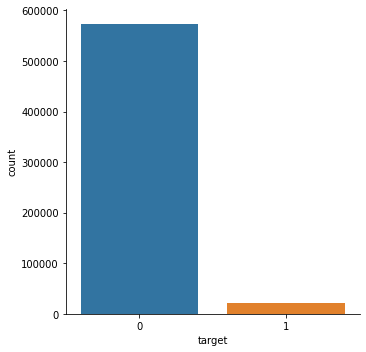

In [89]:
import seaborn as sns
sns.catplot("target",data=data,kind='count')

**Q-2** *Is the data balanced? Meaning are targets 0 and 1 in the right proportion?*

**Ans-2**

No, the data is not at all balanced as it can be seen from the plot above, there is a huge imbalance in the proportions of values 0 and 1 in the target feature.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

 **Q-3** *How many categorical features are there?* 

**Ans-3**

There are 14 categorical features out of 57 features excluding *target* and *id* feature



**Q-4** *How many binary features are there?* 

**Ans-4**

There are 17 binary features out of 57 features excluding *target* and *id* feature

**Q-8** *Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance.*

**Ans-8**

No, the target data is not at all proportionate. Number of people who claimed an insurance(value=0) is only 3.64% whereas the number of people who did not claimed an insurance(value=1) is 96.36%.This shows that the data is imbalanced. 




**Q-9** *What should be the preferred way in this case to balance the data?*

**Ans-9** 

My preferred way will be to perform undersampling on the data, which means we will delete a lot of rows having target value equal to 0, as it is the over-represented class in the dataset. I chose undersampling as we have a lot of rows in this dataset, so losing some data will not affect in decrease of accuracy when we will train models on this data. I will perform random sampling on the data such that i can remove random rows from the data.  

**Q-10** *How many training records are there after achieving a balance of 12%?*

**Ans-10**

To achieve a balance of 12%, 4,15,000 rows have to be dropped from the total no.of 595212 rows in the data such that the number of remaining records becomes 1,80,212.


In [91]:
#performing undersampling on the data

removed_indices = data[data["target"] == 0].index
removed_indices = np.random.choice(removed_indices,415000,replace=False)
rem_samples = data.loc[removed_indices]

data = data.drop(rem_samples.index)
data.shape

(180212, 59)

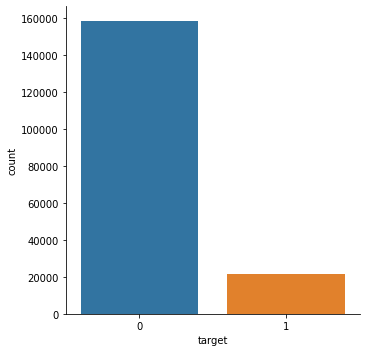

In [92]:
sns.catplot("target",data=data,kind='count')

As can be seen from the plot above, after performing under-sampling there is a significant increase in the (value=1) in target feature.

In [93]:
Total = data.shape[0]
N0=(data[data["target"]==0]).shape[0]
N1=(data[data["target"]==1]).shape[0]
P0 = round((N0/Total)*100,2) #87.96
P1 = round((N1/Total)*100,2) #12.04

print("the percentage of value=1 in target feature has increased from 3.64% to "+str(P1)+"% after performing undersampling on the data")

the percentage of value=1 in target feature has increased from 3.64% to 12.04% after performing undersampling on the data


In [94]:
# As missing values are denoted by the value '-1' in this dataset, replacing all occurences of '-1' to NaN.
from numpy import nan 
data = data.replace(-1,nan)

In [95]:
# this function will print only the features having missing values and the number of missing values in those features.
def disp_MV_features(DS):
    missing_val_count_by_column = (DS.isnull().sum())
    return missing_val_count_by_column[missing_val_count_by_column > 0]

disp_MV_features(data)  

ps_ind_02_cat       102
ps_ind_04_cat        50
ps_ind_05_cat      1952
ps_reg_03         32083
ps_car_01_cat        54
ps_car_03_cat    123468
ps_car_05_cat     79794
ps_car_07_cat      3825
ps_car_09_cat       208
ps_car_11             1
ps_car_14         12953
dtype: int64

**Q-11** *Which are the top two features in terms of missing values?* 

**Ans-11**

The top two features in terms of missing values are *ps_car_03_cat* and *ps_car_05_cat* as infered from the code output above.

**Q-12** *In total, how many features have missing values?* 

**Ans-12**

Total number of features having missing values are 11 as infered from the code output above. 

**Q-13** *What steps should be taken to handle the missing data?* 

**Ans-13**

The steps taken by me to handle missing data  will be to first clean the data by dropping the features having >1K missing values, then i will  fill the missing values in the remaining columns with the mean of their respective features and then i will verify that there are no missing values left in the data.

In [96]:
# I found 6 features with missing values greater than 1000 and i will drop these columns

data_cleaned = data.drop(["ps_ind_05_cat","ps_reg_03","ps_car_03_cat","ps_car_05_cat","ps_car_07_cat","ps_car_14"],axis=1)
data_cleaned.shape

(180212, 53)

In [97]:
# Filling the missing values with mean of their respective features.
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Checking that is there any missing values remaining in the data
disp_MV_features(data_cleaned)

Series([], dtype: int64)

As there are no columns shown above, it means now there are no missing values remaining in the data. 


In [98]:
# Dropping the id column as it is not required at all
data_features = data_cleaned.drop(["id"],axis=1)
data_features.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.00000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,0.120380,1.916865,1.360197,4.430954,0.418584,0.386800,0.264461,0.166260,0.18248,0.000449,0.001765,0.009927,0.000982,0.013123,7.254866,0.654635,0.125896,0.154723,0.613638,0.444545,8.322389,0.825050,0.759483,6.585033,0.828779,1.332931,0.992198,62.426675,2.344807,0.381141,0.818887,3.075143,0.449892,0.450787,0.449563,2.371141,1.885479,7.687895,3.005399,9.223442,2.343767,8.433262,5.437468,1.440026,2.879187,7.540236,0.122822,0.627444,0.554181,0.288116,0.349111,0.154318
std,0.325407,1.991793,0.663335,2.704831,0.493260,0.487019,0.441047,0.372315,0.38624,0.021196,0.041970,0.099140,0.031324,0.131452,3.550863,0.475489,0.331733,0.361642,0.286989,0.407536,2.510207,0.379925,2.201082,5.504273,0.376703,0.974720,0.090899,33.036358,0.835448,0.058860,0.228882,0.723562,0.287223,0.286557,0.286845,1.116427,1.135919,1.334364,1.418511,1.458129,1.248589,2.901471,2.337498,1.202935,1.699807,2.753813,0.328234,0.483487,0.497057,0.452887,0.476690,0.361255
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.308723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,7.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.673955,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,7.000000,1.000000,0.000000,7.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.769217,3.316625,0.400000,0.500000,0.400000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.900000,0.600000,11.000000,1.000000,0.000000,11.000000,1.000000,2.000000,1.000000,94.000000,3.

**Q-1** *Write at least 3 important inferences from the data above*

**Ans-1**

The 3 important inferences from the data above are :-

1.) The number of people who took an insurance claim is only 3.64% out of a data of approx. 60,000 people.

2.) Most of the variables are binary, and in those variables value is zero in most cases as can be infered from the mean.

3.) There are many features in the data having such huge imbalance in them that the minority class is so small that it is not even visible in the histogram of those features.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd633ad748>,
      dtype=object)

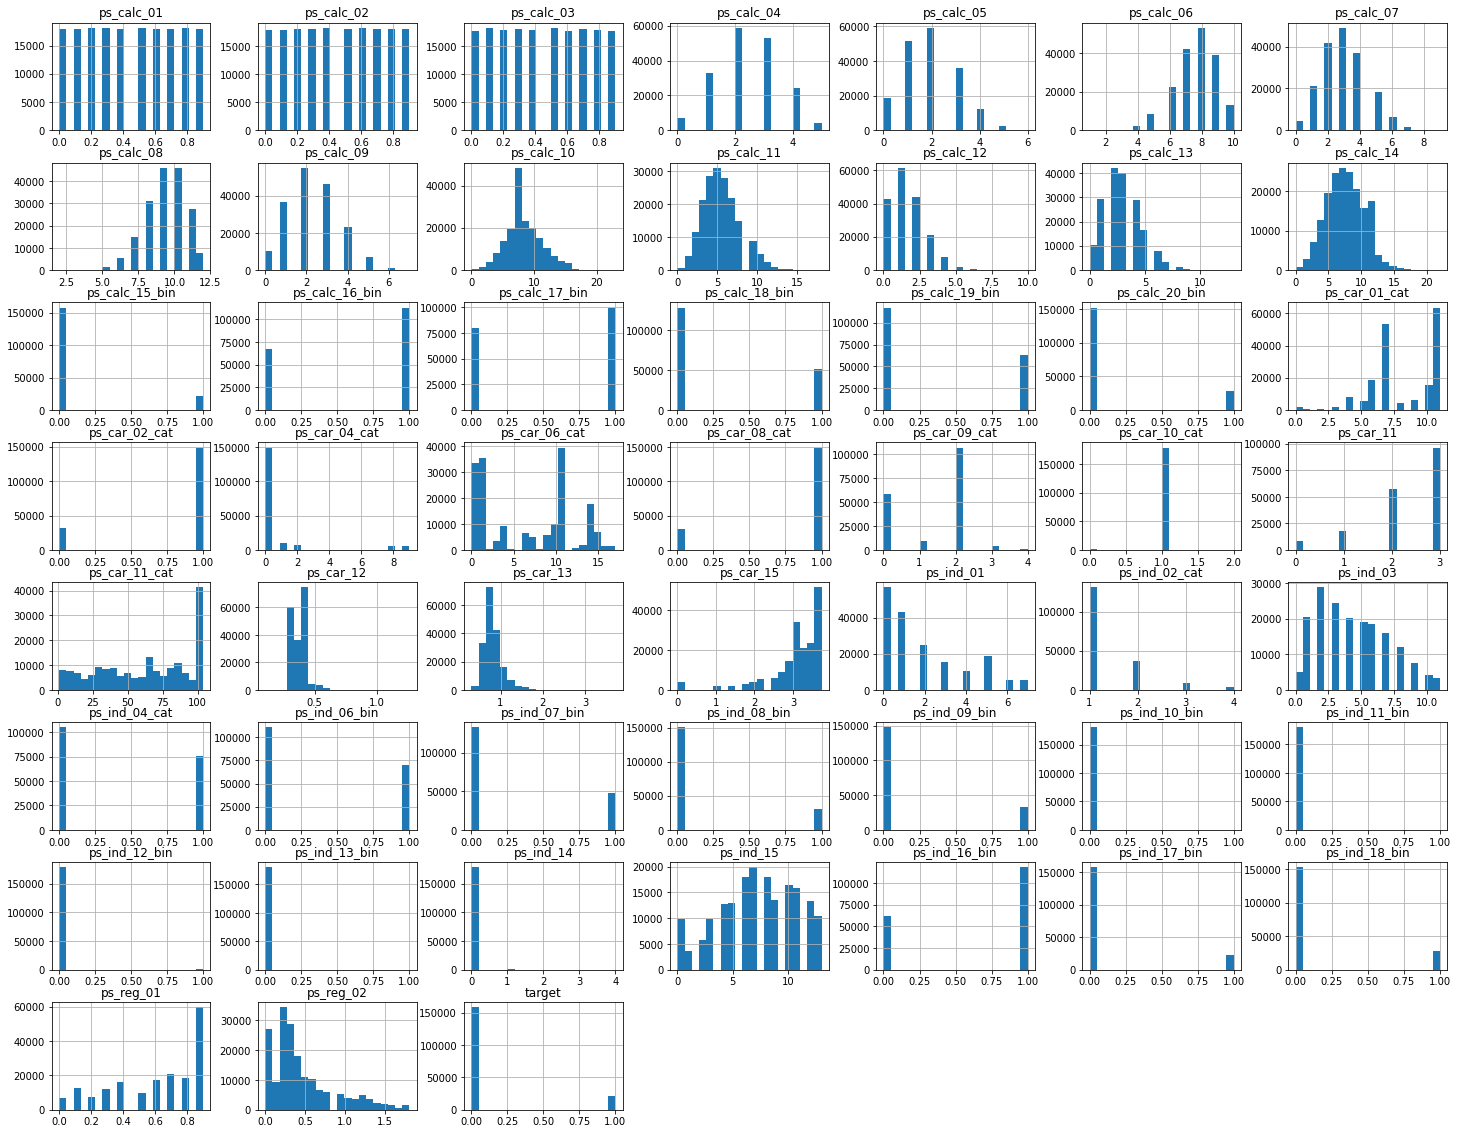

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

data_features.hist(bins=20, figsize=(25,20))

 *From the histogram plot above, i have infered some features which seem to have huge imbalance as a cause of the random sampling performed on the target feature. these features are [ "ps_car_10_cat", "ps_ind_10_bin",    "ps_ind_11_bin", "ps_ind_12_bin", "ps_ind_13_bin" , "ps_ind_14"]*
 
 *I will check the value_counts of these features, and then decide whether to drop these features or not.* 

In [100]:
def check_distribution(column):
  return data_features[column].value_counts()

In [101]:
check_distribution("ps_car_10_cat")  

1    178712
0      1453
2        47
Name: ps_car_10_cat, dtype: int64

In [102]:
check_distribution("ps_ind_10_bin")

0    180131
1        81
Name: ps_ind_10_bin, dtype: int64

In [103]:
check_distribution("ps_ind_11_bin")

0    179894
1       318
Name: ps_ind_11_bin, dtype: int64

In [104]:
check_distribution("ps_ind_12_bin")

0    178423
1      1789
Name: ps_ind_12_bin, dtype: int64

In [105]:
check_distribution("ps_ind_13_bin")

0    180035
1       177
Name: ps_ind_13_bin, dtype: int64

In [106]:
check_distribution("ps_ind_14")

0    178183
1      1745
2       234
3        48
4         2
Name: ps_ind_14, dtype: int64

*I found all the 6 columns to have huge imbalance in them, so i will drop these 6 features.*

In [107]:
data_features = data_features.drop(["ps_car_10_cat","ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","ps_ind_13_bin","ps_ind_14"],axis=1)
data_features.shape

(180212, 46)

*I am going to classify the dataset into 4 subsets according to their datatypes, namely binary, categorical, interval and ordinal.*

In [108]:
data = []

for f in data_features.columns:         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f:
        level = 'categorical'
    elif data_features[f].dtype == float:
        level = 'interval'
    elif data_features[f].dtype == int:
        level = 'ordinal'
    
    # Defining the data type 
    dtype = data_features[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'level': level,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname',  'level',  'dtype'])
meta.set_index('varname', inplace=True)

In [109]:
meta

,level,dtype
varname,,
target,binary,int64
ps_ind_01,ordinal,int64
ps_ind_02_cat,categorical,float64
ps_ind_03,ordinal,int64
ps_ind_04_cat,categorical,float64
ps_ind_06_bin,binary,int64
ps_ind_07_bin,binary,int64
ps_ind_08_bin,binary,int64
ps_ind_09_bin,binary,int64


In [110]:
bin = meta[(meta.level == 'binary')].index
cat = meta[(meta.level == 'categorical')].index
inter = meta[(meta.level == 'interval')].index
ord =   meta[(meta.level == 'ordinal')].index

binary_dataset = data_features[bin]
categorical_dataset = data_features[cat]
interval_dataset = data_features[inter]
ordinal_dataset = data_features[ord]

print("the no. of interval features are : %d " %interval_dataset.shape[1])
print("the no. of ordinal features are : %d " %ordinal_dataset.shape[1])      
print("the no. of binary features are : %d " %binary_dataset.shape[1])
print("the no. of categorical  features are : %d " %categorical_dataset.shape[1])

the no. of interval features are : 9 
the no. of ordinal features are : 14 
the no. of binary features are : 14 
the no. of categorical  features are : 9 


In [111]:
interval_dataset.describe()

,ps_reg_01,ps_reg_02,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,0.613638,0.444545,2.344807,0.381141,0.818887,3.075143,0.449892,0.450787,0.449563
std,0.286989,0.407536,0.835448,0.058860,0.228882,0.723562,0.287223,0.286557,0.286845
min,0.000000,0.000000,0.000000,0.100000,0.308723,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,2.000000,0.316228,0.673955,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,3.000000,0.374166,0.769217,3.316625,0.400000,0.500000,0.400000
75%,0.900000,0.600000,3.000000,0.408412,0.913681,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,3.000000,1.264911,3.720626,3.741657,0.900000,0.900000,0.900000


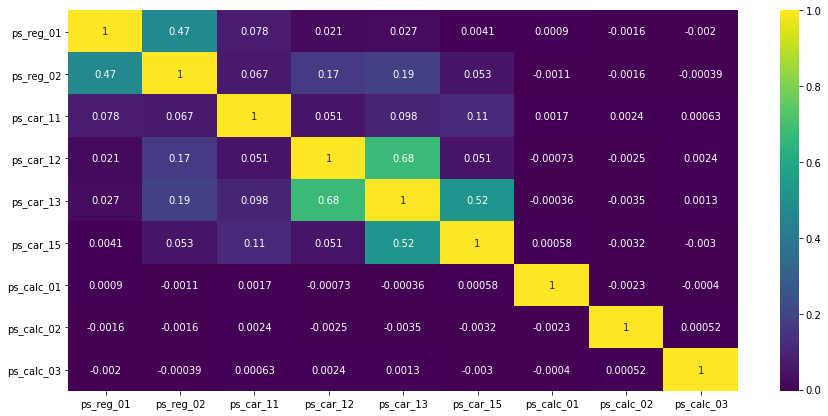

In [112]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(interval_dataset.corr(),cmap='viridis',annot=True)

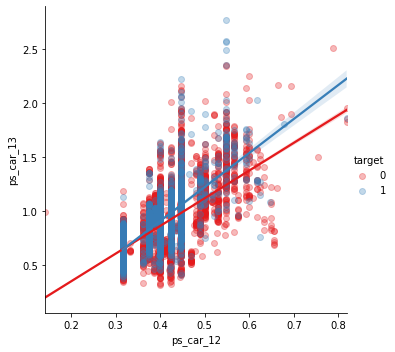

In [113]:
s = data_features.sample(frac=0.1)

sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

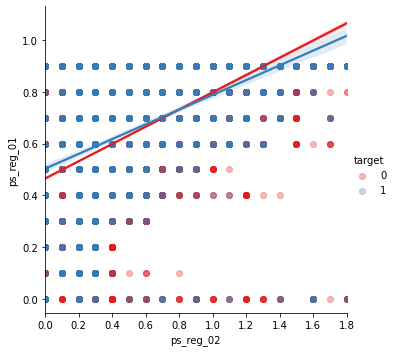

In [114]:

sns.lmplot(x='ps_reg_02', y='ps_reg_01', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**Q-5** *Write inferences from data on interval variables.*

**Ans-5**

Some of the inferences from interval_variables are :-

1). The overall correlation between interval variables is strong as most of the variables have positive correlation.

2). The regression line is best in the case of "ps_car_12" and "ps_car_13", the cause of this could be that they have the best correlation.

In [115]:
ordinal_dataset.describe()

,ps_ind_01,ps_ind_03,ps_ind_15,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,1.916865,4.430954,7.254866,2.371141,1.885479,7.687895,3.005399,9.223442,2.343767,8.433262,5.437468,1.440026,2.879187,7.540236
std,1.991793,2.704831,3.550863,1.116427,1.135919,1.334364,1.418511,1.458129,1.248589,2.901471,2.337498,1.202935,1.699807,2.753813
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,7.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,10.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,13.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,23.000000,18.000000,10.000000,13.000000,22.000000


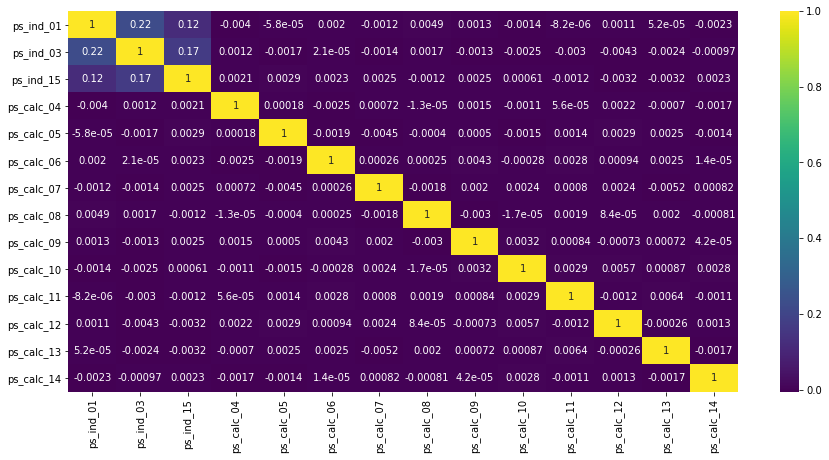

In [116]:
fig,ax = plt.subplots(figsize=(15,7))
sns.heatmap(ordinal_dataset.corr(),cmap='viridis',annot=True)

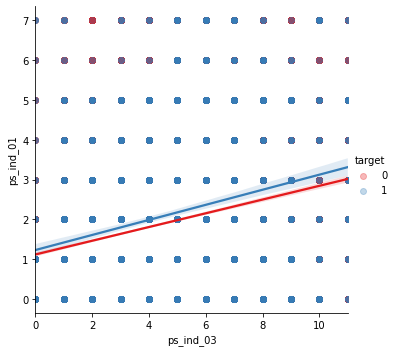

In [117]:
sns.lmplot(x='ps_ind_03', y='ps_ind_01', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

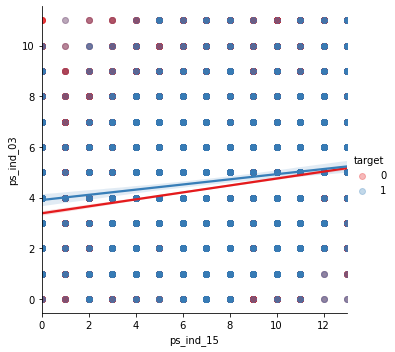

In [118]:
sns.lmplot(x='ps_ind_15', y='ps_ind_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**Q-6** *Write inferences from data on ordinal variables.*

**Ans-6**

Some of the inferences on ordinal variables are :-

1). There is weak correlation among ordinal variables as most of them are either negative or in the range of e^-3(0.001) and less. 

2). The regression plot shows that the 2 most correlated pairs of ordinal variables are not at all in a strong relation with the target variable.  

In [119]:
binary_dataset.describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.00000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,0.120380,0.386800,0.264461,0.166260,0.18248,0.654635,0.125896,0.154723,0.122822,0.627444,0.554181,0.288116,0.349111,0.154318
std,0.325407,0.487019,0.441047,0.372315,0.38624,0.475489,0.331733,0.361642,0.328234,0.483487,0.497057,0.452887,0.476690,0.361255
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Q-7** *Write inferences from data on binary variables.*

**Ans-7**

Some of the inferences on binary variables are :-

1). Apriori in the target column is 3.645%, which is strongly imbalanced.

2). From the means of the binary variables, we can conclude that for most variables the value 0 is much more pre-dominant than value of 1.

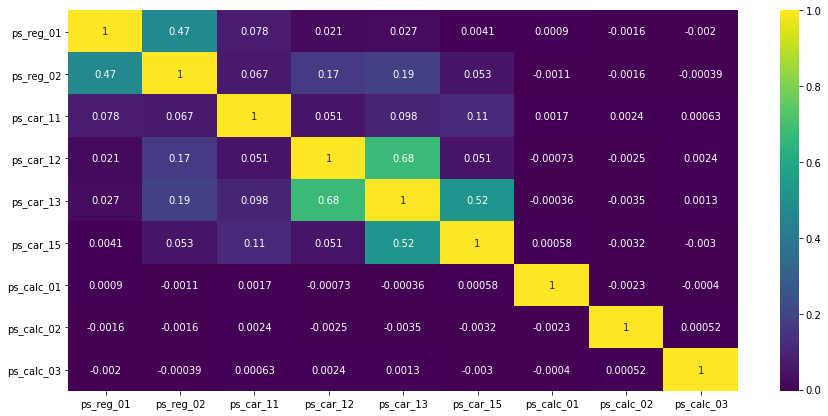

In [120]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(interval_dataset.corr(),cmap='viridis',annot=True)

**Q-14** *Which interval variables have strong correlation?*

**Ans-14**

As infered from the heatmap above, the feature "ps_car_13" seems to have  strong correlations with "ps_car_12" ,"ps_car_15" and "ps_reg_02" of magnitude 0.68, 0.52 and 0.2 respectively. 

Also, "ps_reg_02" has strong correlations with  "ps_reg_01" and "ps_car_12" of magnitude 0.47 and 0.17 respectively.

In total, we found 5 correlations having magnitude greater than 0.1, and thus are considered as strong correlation.

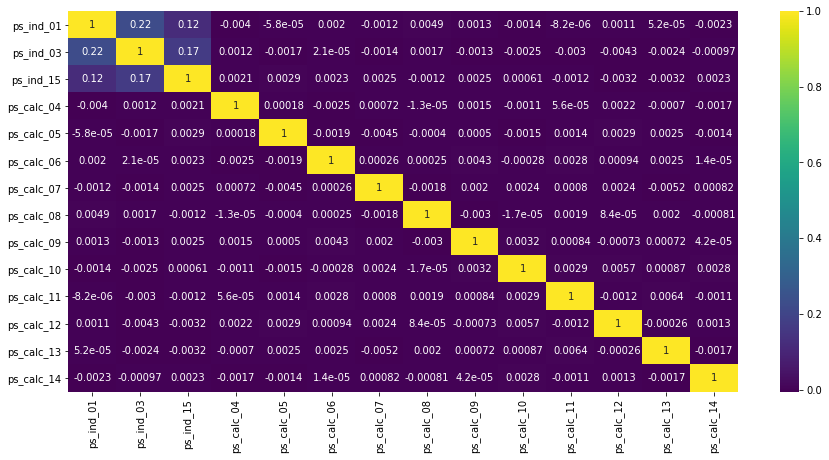

In [121]:
fig,ax = plt.subplots(figsize=(15,7))
sns.heatmap(ordinal_dataset.corr(),cmap='viridis',annot=True)

**Q-15** *What's the level of correlation among ordinal features?*

**Ans-15** 

The level of correlation among ordinal features is very low compared to that of interval features, this is understood as interval features are quantitative whereas ordinal features are qualitative variables, so they have weak correlation amongst them. 

the variable "ps_ind_03" has strong correlation with "ps_ind_01" and "ps_ind_15" with magnitude of 0.23 and 0.17 respectively, also "ps_ind_15" and "ps_ind_01" are correlated with a magnitude of  0.12 .


**Q-16** *Implement Hot Encoding for categorical features*

In [122]:

for f in categorical_dataset:
    dist_values = data_features[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_11_cat has 104 distinct values


the feature "ps_car_11_cat" has 104 distinct values, so we will add noise to it and then perform one-hot encoding on it.


In [123]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,  
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    return add_noise(ft_trn_series, noise_level)

In [124]:
train_encoded = target_encode(data_features["ps_car_11_cat"], 
                             target=data_features.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
data_features['ps_car_11_cat_te'] = train_encoded
data_features.drop('ps_car_11_cat', axis=1, inplace=True)

categorical_dataset['ps_car_11_cat_te'] = train_encoded
categorical_dataset.drop("ps_car_11_cat",axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
data_features.shape[1]

46

**Ans-16** 

One-Hot encoding was applied to a single categorical feature and the number of values in it was increased instead of making dummy variables and increasing the no. of columns in the data.

**Q-17** *In nominal and interval features, which features are suitable for StandardScaler?*

Ans-17

a) *According to me, the categorical features ps_car_01_cat, ps_car_06_cat and ps_car_11_cat are suitable for applying StandardScaler.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd6203bf60>,
      dtype=object)

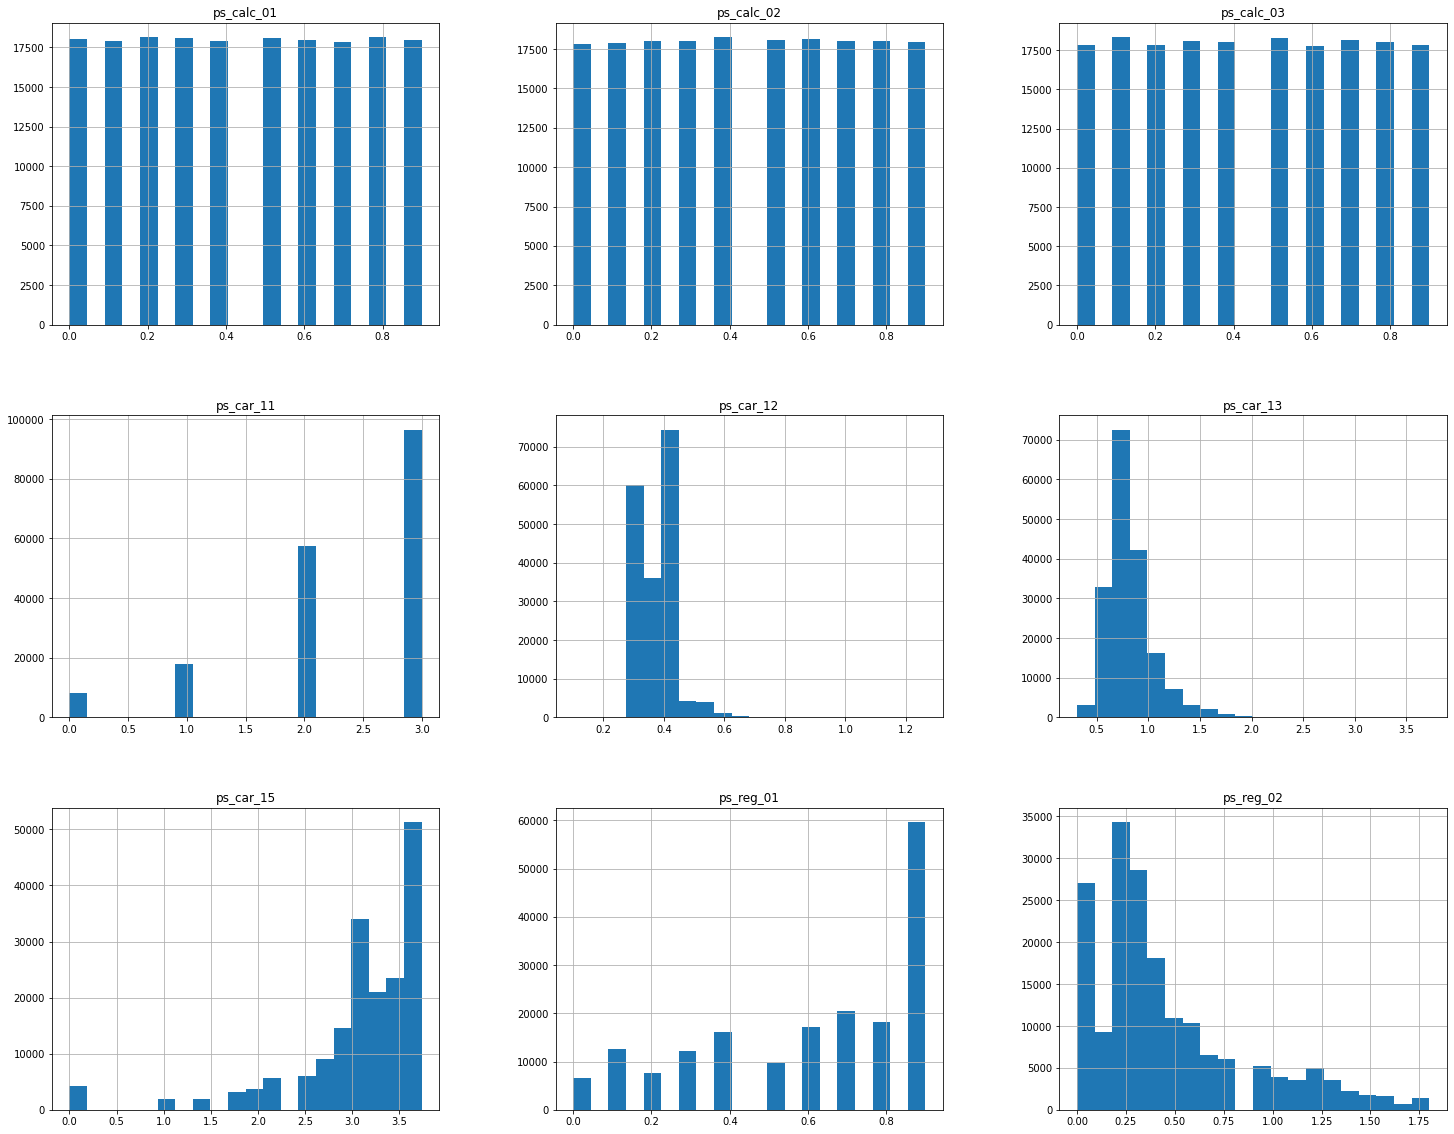

In [126]:
interval_dataset.hist(bins=20, figsize=(25,20))

Ans-17

b) *According to me, the interval features ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_13, ps_car_15, ps_ind_03, ps_ind_15 and ps_reg_02  are suitable for applying StandardScaler.*

In [127]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Scaler.fit_transform(data_features[["ps_car_01_cat", "ps_car_06_cat","ps_car_11_cat_te","ps_calc_01", "ps_calc_02", "ps_calc_03", 
                                    "ps_calc_13", "ps_car_15", "ps_ind_03", "ps_ind_15","ps_reg_02"]])
data_features.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_08_cat,ps_car_09_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
0,0,2,2.0,5,1.0,0,1,0,0,11,0,1,0,0.7,0.2,10.0,1,0,4,0,0.0,2.0,0.400000,0.883679,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,0.128190
1,0,1,1.0,7,0.0,0,0,1,0,3,0,0,1,0.8,0.4,11.0,1,0,11,1,2.0,3.0,0.316228,0.618817,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,0.081608
2,0,5,4.0,9,1.0,0,0,1,0,12,1,0,0,0.0,0.0,7.0,1,0,14,1,2.0,1.0,0.316228,0.641586,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,0.104274
4,0,0,2.0,0,1.0,1,0,0,0,9,1,0,0,0.7,0.6,11.0,1,0,14,1,2.0,3.0,0.316070,0.565832,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,0.087595
9,1,1,1.0,2,0.0,0,1,0,0,4,0,0,1,0.9,1.4,11.0,0,1,14,1,2.0,2.0,0.447214,1.458184,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0,0.146187


**Ans-17**

*Conclusion* 

StandardScaler was applied to the nominal and interval features which were found to be suitable for scaling.

**Q-18** *Summarize the learnings of EDA*

**Ans-18**

I started my EDA part by previewing the data and checking target feature for imbalance as well as finding how many binary and categorical  features are present in the data. I checked and visualized the imbalance in target feature and then balanced the data using random under-sampling. I performed missing value analysis and cleaned the data,filled the  missing values accordingly. 

I found some important inferences for the whole dataset and created 4 simple sub-datasets based on 4 types of datatypes(binary,categorical,ordinal,interval) and then found some inferences for interval,ordinal and binary features.
I peformed correlation analysis on interval and ordinal features,one-hot encoded the categorical features and selected features from set of categorical and interval features using a histogram to apply StandardScaler on them.

The EDA task was quite challenging for me, and also taught me some new concepts
that can be now easily applied by me in any EDA project in the future. I learnt about the importance of finding inferences from the data and how  to recognize features such as ordinal and interval  features from their histograms. 
Other challenges i had was handling a vast number of features.

Some questions in the EDA section were not answered in order as i felt that those tasks should be solved after some other main tasks.

#Modeling Section

##Tasks to be peformed
Following are the deliverables (.ipynb files), which needed to be developed with respect to Modeling :

1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at
all? What is the problem with this model?
2. Why do you think f1-score is 0.0?
3. What is the precision and recall score for the model?
4. What is the most important inference you can draw from the result?
5. What is the accuracy score and f1-score for the improved Logistic Regression model?
6. Why do you think f1-score has improved?
7. For model LinearSVC play with parameters – dual, max_iter and see if there is any
improvement
8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there
improvement in scores?
9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the
reason?
10. What is the increase in number of features after one-hot encoding of the data?
11. Is there any improvement in scores after encoding?
12. If not missing a positive sample is the priority which model is best so far?
13. If not marking negative sample as positive is top priority, which model is best so far?
14. Do you think using AdaBoost can give any significant improvement over XGBoost?
15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers
and size?
16. At what layer size we get the best f1-score?




In [128]:
X = data_features.drop(["target"],axis=1)
Y = data_features["target"]
print(X.shape,Y.shape)

(180212, 45) (180212,)


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(144169, 45) (36043, 45)
(144169,) (36043,)


In [130]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='saga', max_iter=2000,random_state=42)
LR.fit(x_train,y_train)
Ypred_LR = LR.predict(x_test)

In [131]:
from sklearn.metrics import accuracy_score
AC_LR = accuracy_score(y_test,Ypred_LR)*100
print("the accuracy score in percentage is : %.2f" % AC_LR)

the accuracy score in percentage is : 87.96


In [132]:
from sklearn.metrics import confusion_matrix
CM_LR = confusion_matrix(y_test,Ypred_LR)
CM_LR 

array([[31703,     0],
       [ 4340,     0]])

**Q-1** The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at
all? What is the problem with this model?

*Ans-1*

At first look, it looks that the model will work great as it has a high accuracy score but on printing the confusion matrix it is found out that the no. of true positive values and false positive values for this model  is 0, which means that it is not at at all an accurate model as will be seen from results of other model evaluation metrics.

In [133]:
from sklearn.metrics import f1_score
print("the f1_score is : %.1f" % f1_score(y_test,Ypred_LR))

the f1_score is : 0.0


**Q-2** Why do you think f1-score is 0.0?

*Ans-2*

The number of true positive values for this model is 0, because of which values of precision and recall also  came out to be 0 and ultimately f1-score is also 0.

In [134]:
from sklearn.metrics import precision_score, recall_score
print("Precision score is : %.2f" % precision_score(y_test,Ypred_LR,zero_division="warn"))
print("Recall score is : %.2f" % recall_score(y_test,Ypred_LR))


Precision score is : 0.00
Recall score is : 0.00


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Q-3** What is the precision and recall score for the model?

*Ans-3*

the precision score and recall score is as follows:

Precision score is : 0.00

Recall score is : 0.00

this happened as a result of no. of true positive values being 0.

**Q-4** What is the most important inference you can draw from the result?

*Ans-4*

The most important inference that can be drawn from the above result is that accuracy_score alone is not enough in determining the strength of a model, other metrics are also equally important in determining the strengh of a model  and finding anomalies in the data.
  

In [135]:
LR2 = LogisticRegression(solver='saga',max_iter=2000,random_state=42,class_weight='balanced')
LR2.fit(x_train,y_train)
Ypred_LR2 = LR2.predict(x_test)

CM_LR2 = confusion_matrix(y_test,Ypred_LR2)
CM_LR2

array([[19320, 12383],
       [ 1932,  2408]])

In [136]:
AC_LR2 = accuracy_score(y_test,Ypred_LR2)*100
F1_LR2 = f1_score(y_test,Ypred_LR2)
print("the accuracy score in percentage is : %.2f" % AC_LR2)
print("the f1_score  is : %.2f" % F1_LR2)

the accuracy score in percentage is : 60.28
the f1_score  is : 0.25


**Q-5** *What is the accuracy score and f1-score for the improved Logistic Regression model ?*

Ans-5

the accuracy score and f1-score for the improved Logistic Regression model is as follows:

the accuracy score in percentage comes to be around near 60% everytime

the f1_score  is : 0.25

in improving the model, the accuracy score decreased while the f1_score improved 

**Q-6** *Why do you think f1-score has improved?*

Ans-6 

The f1-score improved because of using the class_weights parameter in LogisticRegression and setting it to "balanced".

In [137]:
from sklearn.svm import LinearSVC
SVC = LinearSVC(dual=False,max_iter=2000)
SVC.fit(x_train,y_train)
Ypred_SVC = SVC.predict(x_test)

In [138]:
AC_SVC = accuracy_score(y_test,Ypred_SVC)*100
AC_SVC

87.95882695669061

In [139]:
CM_SVC = confusion_matrix(y_test,Ypred_SVC,)
CM_SVC

array([[31703,     0],
       [ 4340,     0]])

In [140]:
f1_SVC = f1_score(y_test,Ypred_SVC)
f1_SVC

0.0

**Q-7** *For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement.*

*Ans-7*

After implementing LinearSVC and playing with parameters dual and max_iter, there was a great improvement in the f1-score of the model.
the model didn't even converge if the parameter dual is not set to False, and on trying many different values in max_iter parameter, we found that the 

In [141]:
# Creating a sample with only 100K records
data_100K = data_features.sample(n=100000,random_state=1,axis=0)
data_100K.shape

(100000, 46)

87879 12121


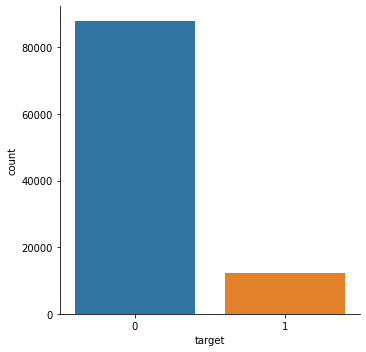

In [142]:
# Imbalance Check
sns.catplot("target",data = data_100K,kind="count")
N0 = data_100K[data_100K["target"]==0].shape[0]
N1 = data_100K[data_100K["target"]==1].shape[0]
print(N0,N1)

As the percentage of minority class is almost 12%, the data is at a manageable rate of imbalance. 

In [143]:
def plot_feature_importance(importance,names,model_type):

            #Create arrays from feature importance and feature names
            feature_importance = np.array(importance)
            feature_names = np.array(names)

            #Create a DataFrame using a Dictionary
            data={'feature_names':feature_names,'feature_importance':feature_importance}
            fi_df = pd.DataFrame(data)

            #Sort the DataFrame in order decreasing feature importance
            fi_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)

            #Define size of bar plot
            plt.figure(figsize=(10,8))
            #Plot Searborn bar chart
            sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
            #Add chart labels
            plt.title(model_type + 'FEATURE IMPORTANCE')
            plt.xlabel('FEATURE IMPORTANCE')
            plt.ylabel('FEATURE NAMES')


def top_25_features(data,model):
          featureImp =[]
          for feat, importance in zip(data.columns, model.feature_importances_):  
                temp = [feat, importance*100]
                featureImp.append(temp)

          fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
          top15_df = fT_df.sort_values('Importance', ascending = False).head(25)
          return list(top15_df["Feature"])            

In [144]:
X_100K = data_100K.drop("target",axis=1)
Y_100K = data_100K.target
x_train_100K,x_test_100K,y_train_100K,y_test_100K = train_test_split(X_100K,Y_100K,test_size=0.2,random_state=1)
print(x_train_100K.shape,x_test_100K.shape)
print(y_train_100K.shape,y_test_100K.shape)

(80000, 45) (20000, 45)
(80000,) (20000,)


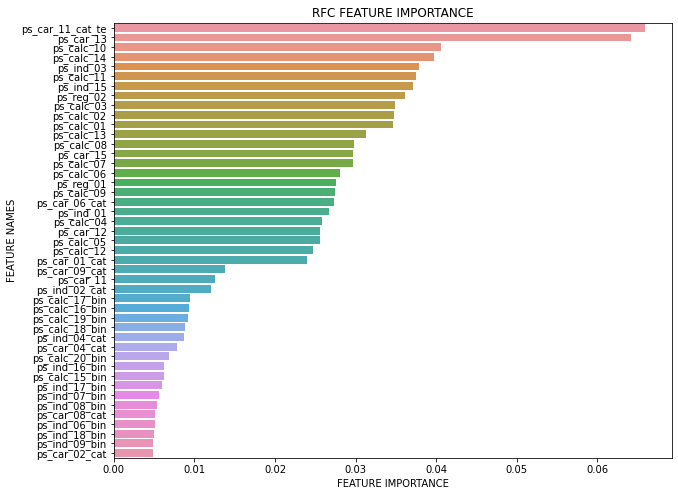

In [145]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train_100K,y_train_100K)

plot_feature_importance(RFC.feature_importances_,x_train_100K.columns,"RFC ")

In [146]:
optimized_features = top_25_features(x_train_100K,RFC)
optimized_features

['ps_car_11_cat_te',
 'ps_car_13',
 'ps_calc_10',
 'ps_calc_14',
 'ps_ind_03',
 'ps_calc_11',
 'ps_ind_15',
 'ps_reg_02',
 'ps_calc_03',
 'ps_calc_02',
 'ps_calc_01',
 'ps_calc_13',
 'ps_calc_08',
 'ps_car_15',
 'ps_calc_07',
 'ps_calc_06',
 'ps_reg_01',
 'ps_calc_09',
 'ps_car_06_cat',
 'ps_ind_01',
 'ps_calc_04',
 'ps_car_12',
 'ps_calc_05',
 'ps_calc_12',
 'ps_car_01_cat']

In [147]:
X_100K = data_100K[optimized_features]
Y_100K = data_100K.target
x_train_100K,x_test_100K,y_train_100K,y_test_100K = train_test_split(X_100K,Y_100K,test_size=0.2,random_state=1)
print(x_train_100K.shape,x_test_100K.shape)
print(y_train_100K.shape,y_test_100K.shape)

(80000, 25) (20000, 25)
(80000,) (20000,)


In [148]:
from sklearn.svm import LinearSVC
SVC2 = LinearSVC(dual=False,max_iter=3500)
SVC2.fit(x_train_100K,y_train_100K)
Ypred_SVC2 = SVC2.predict(x_test_100K)

In [149]:
AC_SVC2 = accuracy_score(y_test_100K,Ypred_SVC2)*100
AC_SVC2

87.96000000000001

In [150]:
f1_SVC2 = f1_score(y_test_100K,Ypred_SVC2,average="micro",zero_division='warn')
f1_SVC2

0.8796

**Q-8** SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?

Ans-8

yes, there is an improvement in scores after sampling down to 100K records, performing imbalance check, feature optimization and then applying LinearSVC on the data. The accuracy has increased a little bit and the f1_score has also improved drastically.

In [151]:
from xgboost import XGBClassifier

XGB = XGBClassifier(learning_rate =0.05,n_estimators=1000,max_depth=4 ,min_child_weight=1, gamma=5, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',nthread=4, scale_pos_weight=1, seed=1234)
XGB.fit(x_train,y_train,eval_metric="auc")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
              silent=None, subsample=0.8, verbosity=1)

In [152]:
Ypred_XGB = XGB.predict(x_test)
AC_XGB = accuracy_score(y_test,Ypred_XGB)*100
AC_XGB

87.95605249285575

In [153]:
CM_XGB = confusion_matrix(y_test,Ypred_XGB)
CM_XGB 

array([[31693,    10],
       [ 4331,     9]])

In [154]:
F1_XGB = f1_score(y_test,Ypred_XGB)
F1_XGB 

0.0041293874741913286

**Q-9** XGBoost is one of the better classifiers -- but still f1-score is very low. What could be the reason?

Ans-9

f1-score is still very low even after applying XGBoost this tells that when it comes to giving high accuracy and low error, data quality is much  more important than the strength of the algorithm used. 


In [155]:
print('Before dummification we have {} variables in train'.format(data_features.shape[1]))
categorical_variables = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_car_01_cat', 'ps_car_02_cat']

data_features = pd.get_dummies(data_features, columns=categorical_variables, drop_first=True)
print('After dummification we have {} variables in train'.format(data_features.shape[1]))

Before dummification we have 46 variables in train
After dummification we have 61 variables in train


**Q-10**What is the increase in number of features after one-hot encoding of the data?

**Ans-10**

Number of features after one-hot encoding of the data has increased from 46 features to 61 features.   

In [ ]:
def top_50_features(data,model):
          featureImp =[]
          for feat, importance in zip(data.columns, model.feature_importances_):  
                temp = [feat, importance*100]
                featureImp.append(temp)

          fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
          top15_df = fT_df.sort_values('Importance', ascending = False).head(50)
          return list(top15_df["Feature"])   

**Q-11** Is there any improvement in scores after encoding?

**Ans-11**

I believe there will be no significant improvement in accuracy scores after encoding as only some categorical variables were encoded and the binary variables with huge imbalance are still present.

**Q-12** If not missing a positive sample is the priority which model is best so far?

**Ans-12**

the model which seems to have a priority in not missing a positive sample(highest value of TP), is the improved version of LinearRegression  model(LR2)  with a magnitude approximately near to around 2400.

**Q-13** If not marking negative sample as positive is top priority, which model is best so far?

**Ans-13**

the model which seems to have a priority in not missing a positive sample(highest value of TN), are the  models LinearRegression(LR) and LinearSVC (SVC)  with a magnitude approximately near to around 32,500.


In [156]:
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier()
AdaB.fit(x_train,y_train)
Ypred_AdaB = AdaB.predict(x_test)

In [157]:
CM_AdaB = confusion_matrix(y_test,Ypred_AdaB)
CM_AdaB

array([[31702,     1],
       [ 4339,     1]])

**Q-14** Do you think using AdaBoost can give any significant improvement over XGBoost?

**Ans-14** 

Looking at the confusion matrix of AdaBoost classifier, i think that it's f1_score will be more or less same to that of XGBoost. 

In [158]:
F1_AdaB = f1_score(y_test,Ypred_AdaB)
F1_AdaB

0.000460617227084293

**Q-15** MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

**Ans-15**

there is no analytical rule of thumb to choose the right no. of layers and size,but i think that the no. of layers should not be more than 2 or 3 for a classification problem and the size of layers should start from a number close to the no. of features (no. of features is 61, hence i chose 64 as size of first layer) and layer size should decrease while increasing the layer size.

In [170]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(64,16,4), epsilon=1e-08, learning_rate='constant',learning_rate_init=0.002, max_iter=800,activation ="logistic",solver='adam',random_state=1)
MLP.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 16, 4), learning_rate='constant',
              learning_rate_init=0.002, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [171]:
Ypred_MLP = MLP.predict(x_test)
CM_MLP = confusion_matrix(y_test,Ypred_MLP)
CM_MLP

array([[31424,   279],
       [ 4257,    83]])

In [172]:
F1_MLP =f1_score(y_test,Ypred_MLP)
F1_MLP

0.0353041259038707

**Q-16** At what layer size we get the best f1-score?

**Ans-16**

The no. of layers is 3 and the layer size is (64,16,4) which gave an f1_score of 0.035 which was the best ever in the last 5 iterations after trying a lot of changes in layer sizes and many other hyperparameters of the MLP model such as "learning_rate_init" and "max_iter".